In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

sns.set_theme(style="darkgrid")
import warnings
# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'


# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
booking_df = pd.read_csv('hotel_bookings.csv', encoding='utf-8')
booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
booking_df.shape

(119390, 32)

In [4]:
# 데이터 정보 확인
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# 수치형 데이터 확인
booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# 전체 데이터 확인
booking_df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [7]:
# 결측치 확인
booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 결측치
- children:4
- country: 488
- agent: 16340
- company: 112593

# 데이터 전처리

In [8]:
# children 정보 확인
# -> 대부분의 값이 0이기에 결측치 4개는 0으로 변경
booking_df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [9]:
# 대부분의 값이 0이기에 결측값도 0으로 처리
booking_df.fillna(0, inplace=True)
booking_df['children'].isnull().sum()

0

In [10]:
# country column 결측치 삭제
# -> 대체할 값이 명확하지 않음 -> 삭제
booking_df.dropna(subset = ['country'], inplace=True)
booking_df['country'].isnull().sum()

0

In [11]:
# agent, company market_segment, distribution_channel, column  -> 쓸모 없다고 판단 -> 삭제
booking_df.drop(columns = ['agent', 'company', 'market_segment', 'distribution_channel'], inplace=True)
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
# 결측치 확인
booking_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [13]:
# adr이 음수일 수는 없으니 0이하인 값들은 제거
booking_df = booking_df[booking_df['adr']>=0]

In [14]:
booking_df['adr'].min()

0.0

In [15]:
booking_df.to_csv('booking_filtered.csv', index=False)

In [16]:
booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## 취소 여부에 따른 분석
- 호텔 종류와 예약 취소의 관계
- 대기 시간과 예약 취소의 관계
- 자식 수에 따른 예약 취소 여부
- 예약 객실에 따른 예약 취소 여부(객실에 따라 비용이 차이가 크기에)
- 평균 일일 숙박비에 따른 예약 취소 여부

## 1-1 호텔 종류와 예약 취소 관계

In [17]:
# 종류 확인
booking_df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40059
Name: hotel, dtype: int64

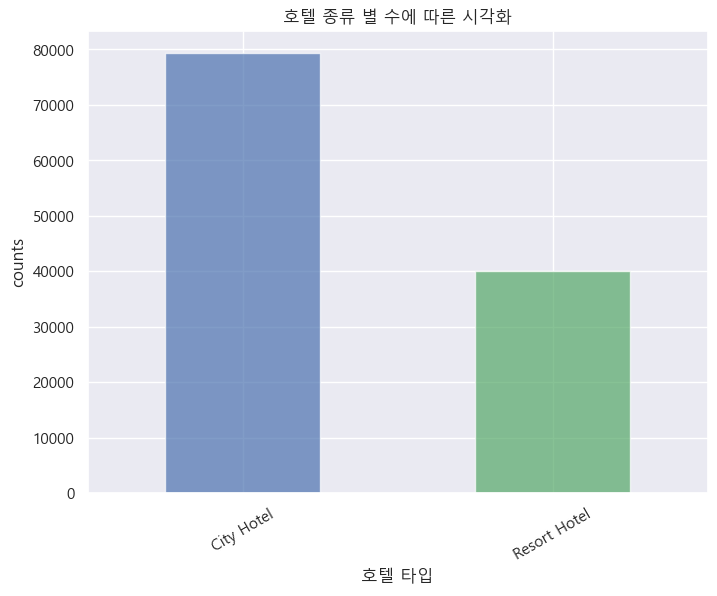

In [74]:
# 시각화
plt.figure(figsize=(8, 6))
booking_df['hotel'].value_counts().plot(kind='bar', color = ['b', 'g'], alpha=0.7)
plt.title('호텔 종류 별 수에 따른 시각화')
plt.xlabel('호텔 타입')
plt.ylabel('counts')
plt.xticks(rotation=30)
plt.show()

- city hotel, resort hotel 존재
- city hotel이 2배 정도 더 많음

In [19]:
# 예약 취소 확인
booking_df['is_canceled'].value_counts()

0    75165
1    44224
Name: is_canceled, dtype: int64

## 예약 취소에 따른 비율 확인을 위해 pie chart 확인

### 전체 호텔 대상 예약 취소 비율

In [20]:
values = booking_df['is_canceled'].value_counts().values
# labels = booking_df['is_canceled'].value_counts().index

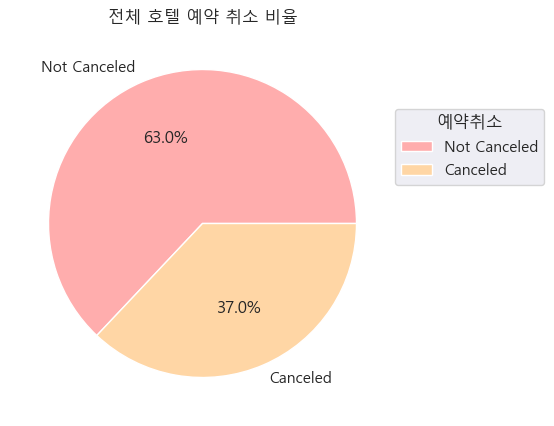

In [21]:
plt.figure(figsize = (10,5))
plt.title('전체 호텔 예약 취소 비율')
plt.pie(values, 
        labels = booking_df['is_canceled'].value_counts().index.map({0: 'Not Canceled', 1: 'Canceled'}),
        autopct = '%.1f%%',
        colors = ['#ffadad', '#ffd6a5']
        )
plt.legend(loc = (1, 0.6), title='예약취소')
plt.show()

### 호텔 별 예약 취소 비율

In [22]:
booking_df['hotel']

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119389, dtype: object

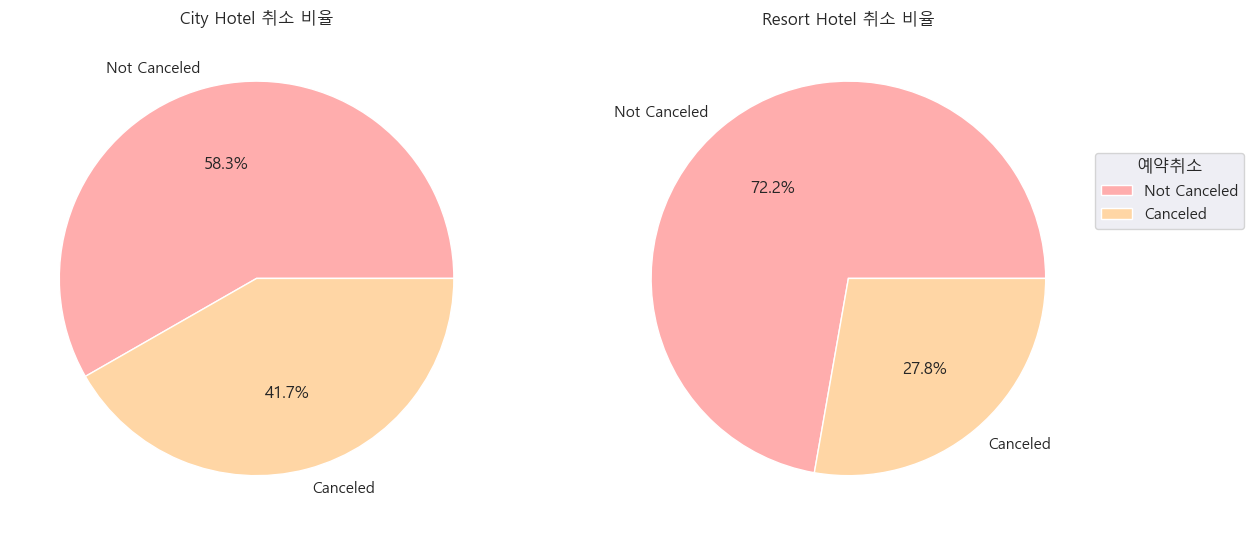

In [23]:
# 호텔 별 예약 취소 비율
city_cancellation = booking_df[booking_df['hotel'] == 'City Hotel']['is_canceled'].value_counts(normalize=True) * 100
resort_cancellation = booking_df[booking_df['hotel'] == 'Resort Hotel']['is_canceled'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(city_cancellation,
          labels=city_cancellation.index.map({0: 'Not Canceled', 1: 'Canceled'}),
          colors = ['#ffadad', '#ffd6a5'],
          autopct='%.1f%%')
ax[0].set_title('City Hotel 취소 비율')

ax[1].pie(resort_cancellation, 
          labels=resort_cancellation.index.map({0: 'Not Canceled', 1: 'Canceled'}),
          colors = ['#ffadad', '#ffd6a5'],
          autopct='%.1f%%')
ax[1].set_title('Resort Hotel 취소 비율')
         
plt.legend(loc = (1, 0.6), title='예약취소')
plt.show()

### 전체 호텔 대상 예약 취소 비율
- 약 37%가 취소함
- -> 생각보다 취소 비율이 높았음

### 호텔 별 예약 취소 비율
- city hotel의 경우 약 41.7%가 취소하였고
- resort hotel의 경우 약 27.8%가 취소하였음
- city hotel은 도심에 위치해 접근성이 쉬워 취소 비율이 높았을 것이라 판단

## 1-2  대기시간에 따른 예약 취소 관계

In [24]:
booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


<function matplotlib.pyplot.show(close=None, block=None)>

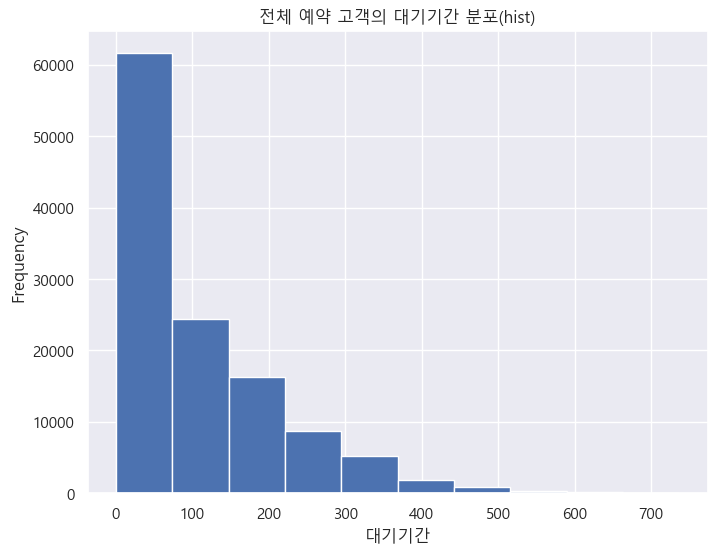

In [77]:
# 대기시간의 분포 확인 -> 히스토그램 이용
plt.figure(figsize=(8, 6))
booking_df['lead_time'].plot(kind = 'hist')
plt.title('전체 예약 고객의 대기기간 분포(hist)')
plt.xlabel('대기기간')
plt.show

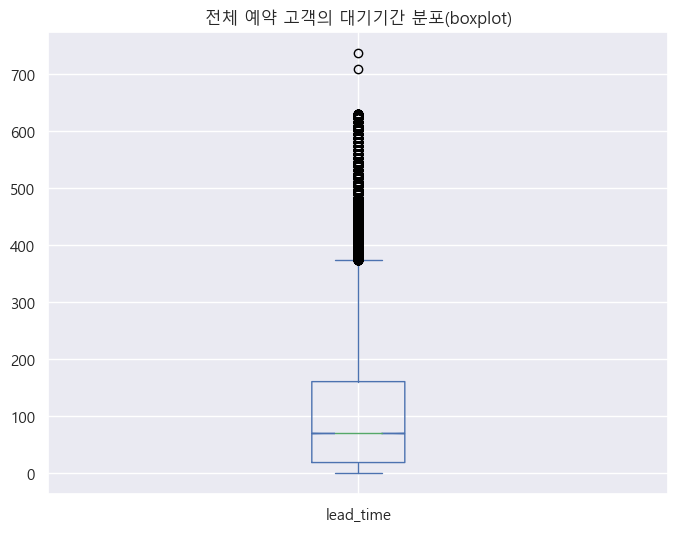

In [26]:
# 대기시간의 분포 확인 -> boxplot 이용
plt.figure(figsize=(8, 6))
plt.title('전체 예약 고객의 대기기간 분포(boxplot)')
booking_df['lead_time'].plot(kind = 'box',
                            notch=True)
plt.show()

In [27]:
# lead_time 확인
booking_df['lead_time'].describe()

count    119389.000000
mean        104.010654
std         106.863220
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

- 중앙값은 104일이고
- 상위 75%까지 160일 이내이고
- box plot상으로 대부분이 200일 이내임을 확인 가능

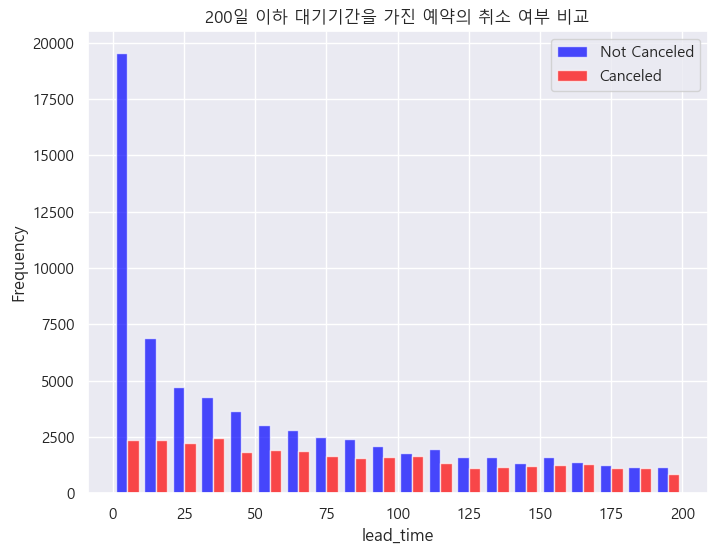

In [28]:
# 대기시간과 예약 취소 비교

plt.figure(figsize=(8, 6))
# 200일 이하인 데이터
filtered_200 = booking_df[booking_df['lead_time']<=200]

# 예약 취소한 경우
filltered_200_canceled = filtered_200[filtered_200['is_canceled']==1]['lead_time']

# 예약이 취소하지 않은 경우
filltered_200_not_canceled = filtered_200[filtered_200['is_canceled']==0]['lead_time']

plt.hist([filltered_200_not_canceled, filltered_200_canceled], 
         label=['Not Canceled', 'Canceled'],
         color=['blue', 'red'], 
         alpha=0.7, 
         bins=20)
plt.title('200일 이하 대기기간을 가진 예약의 취소 여부 비교')
plt.xlabel('lead_time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

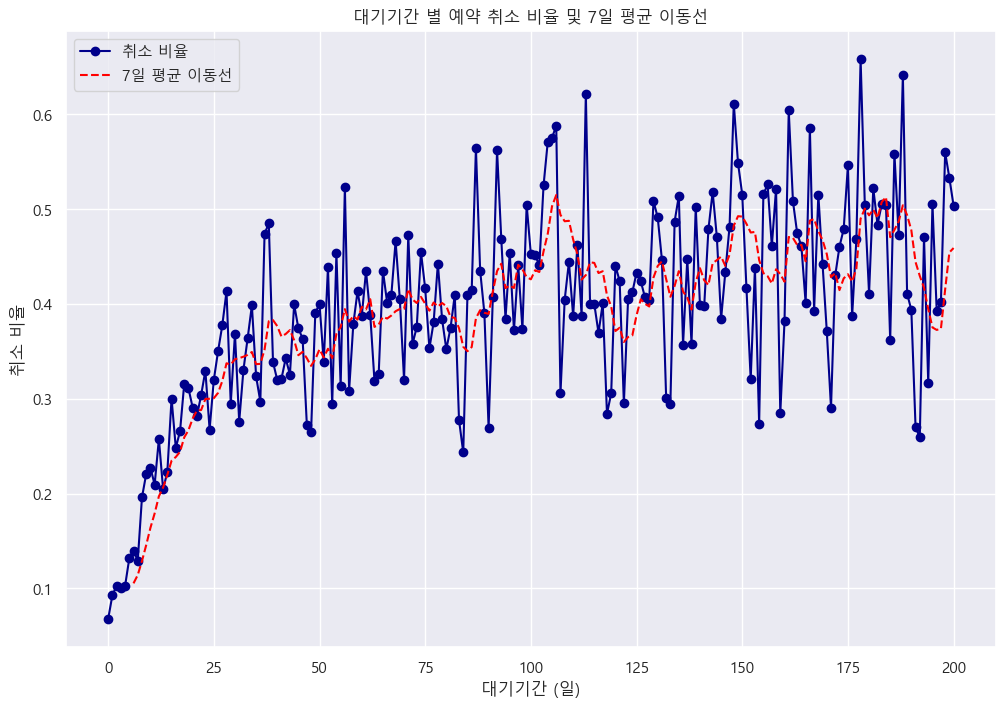

In [29]:
# 대기기간 별 총 예약 개수 및 취소된 예약의 개수 계산
lead_time_stats = filtered_200.groupby('lead_time')['is_canceled'].agg(['count', 'sum']).reset_index()

# 취소 비율 계산 (취소된 예약의 개수 / 총 예약 개수)
lead_time_stats['cancel_rate'] = lead_time_stats['sum'] / lead_time_stats['count']

# 7일 평균 이동선 계산
lead_time_stats['7_day_moving_avg'] = lead_time_stats['cancel_rate'].rolling(window=7).mean()

# 시각화
plt.figure(figsize=(12, 8))
plt.plot(lead_time_stats['lead_time'], lead_time_stats['cancel_rate'], marker='o', linestyle='-', 
         color='darkblue', label='취소 비율')
plt.plot(lead_time_stats['lead_time'], lead_time_stats['7_day_moving_avg'], linestyle='--', color='red', 
         label='7일 평균 이동선')
plt.title('대기기간 별 예약 취소 비율 및 7일 평균 이동선')
plt.xlabel('대기기간 (일)')
plt.ylabel('취소 비율')
plt.legend()
plt.grid(True)
plt.show()

- 대기 기간에 따라 예약 취소 비율의 크기 차이가 없어 보임
### =>리드타임은 예약 취소에 영향을 미치지 않아 보인다

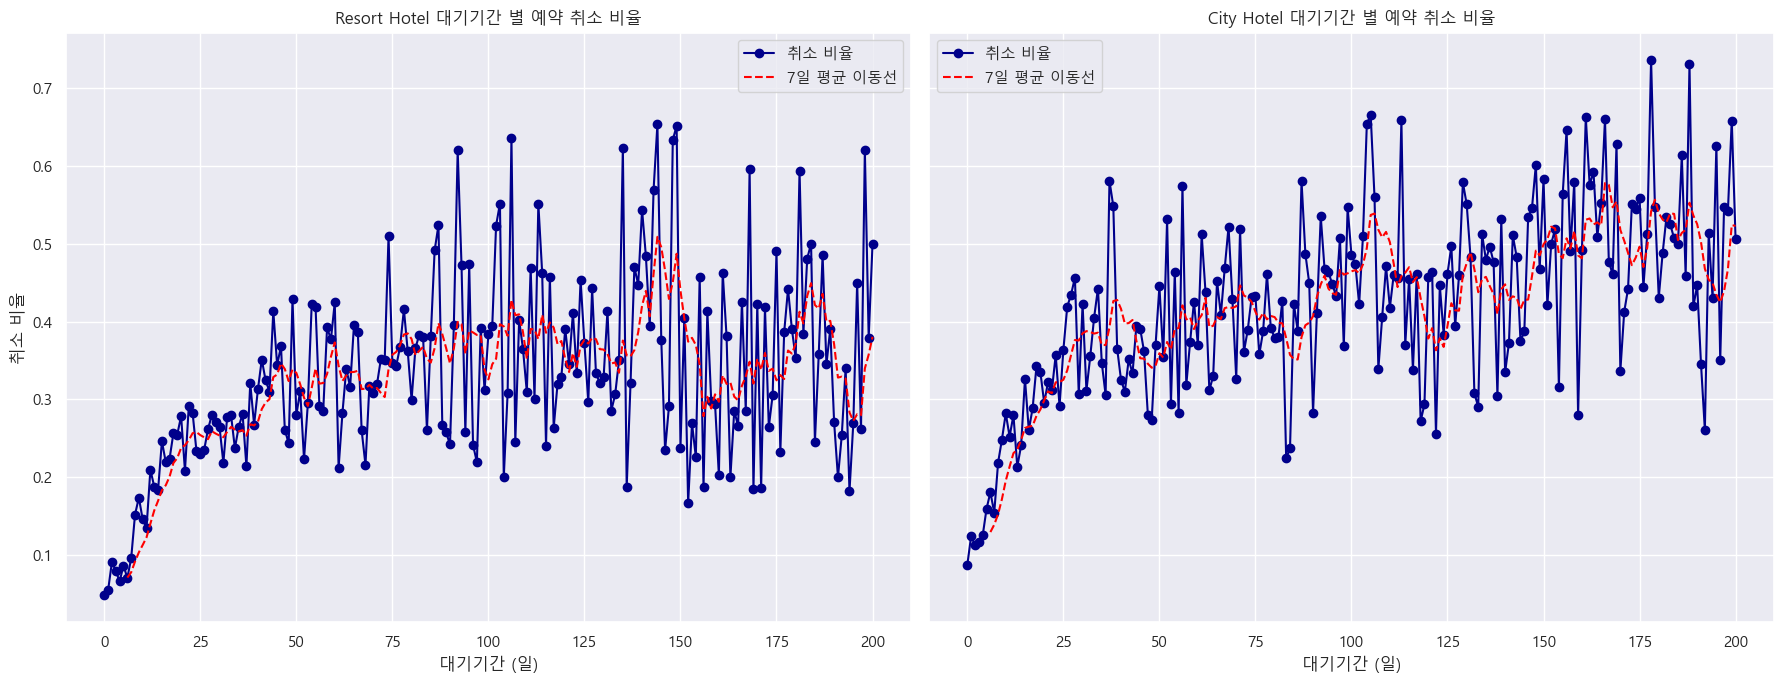

In [30]:
# 호텔 타입별(Resort, City)로 데이터 분리
resort_df = filtered_200[filtered_200['hotel'] == 'Resort Hotel']
city_df = filtered_200[filtered_200['hotel'] == 'City Hotel']

# 대기기간 별 취소 비율 계산 함수
def calculate_cancel_rate(df):
    stats = df.groupby('lead_time')['is_canceled'].agg(['count', 'sum']).reset_index()
    stats['cancel_rate'] = stats['sum'] / stats['count']
    stats['7_day_moving_avg'] = stats['cancel_rate'].rolling(window=7).mean()
    return stats

# Resort와 City 호텔 각각에 대한 대기기간 별 취소 비율과 7일 평균 이동선 계산
resort_stats = calculate_cancel_rate(resort_df)
city_stats = calculate_cancel_rate(city_df)

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7), sharey=True)

axes[0].plot(resort_stats['lead_time'], resort_stats['cancel_rate'], marker='o', 
             linestyle='-', color='darkblue', label='취소 비율')
axes[0].plot(resort_stats['lead_time'], resort_stats['7_day_moving_avg'], 
             linestyle='--', color='red', label='7일 평균 이동선')
axes[0].set_title('Resort Hotel 대기기간 별 예약 취소 비율')
axes[0].set_xlabel('대기기간 (일)')
axes[0].set_ylabel('취소 비율')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(city_stats['lead_time'], city_stats['cancel_rate'], marker='o', linestyle='-', color='darkblue', 
             label='취소 비율')
axes[1].plot(city_stats['lead_time'], city_stats['7_day_moving_avg'], linestyle='--', color='red', label='7일 평균 이동선')
axes[1].set_title('City Hotel 대기기간 별 예약 취소 비율')
axes[1].set_xlabel('대기기간 (일)')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\2206675896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_200['lead_time_bin'] = pd.cut(filtered_200['lead_time'], bins=range(0, max(filtered_200['lead_time']) + 7, 7), right=False)


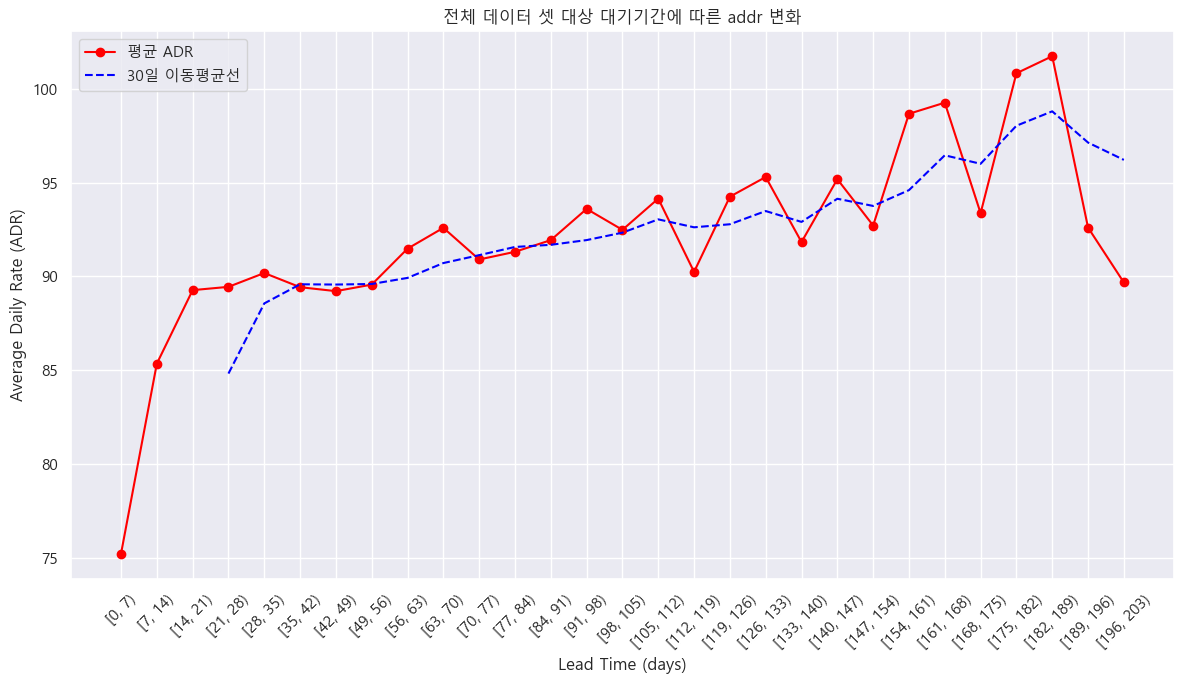

In [87]:
filtered_200 = booking_df[(booking_df['lead_time'] <= 200) & (booking_df['adr'] <= 150)]

# lead_time을 10일 단위로 그룹화한 컬럼 생성
filtered_200['lead_time_bin'] = pd.cut(filtered_200['lead_time'], bins=range(0, max(filtered_200['lead_time']) + 7, 7), right=False)

# 각 그룹의 평균 adr 계산
grouped_data_bin = filtered_200.groupby('lead_time_bin')['adr'].mean().reset_index()

# 타입 변경
grouped_data_bin['lead_time_bin'] = grouped_data_bin['lead_time_bin'].astype(str)

# 30일 이동평균선 계산
grouped_data_bin['moving_average_adr'] = grouped_data_bin['adr'].rolling(window=4).mean()

# 시각화
plt.figure(figsize=(12, 7))
plt.plot(grouped_data_bin['lead_time_bin'], grouped_data_bin['adr'], label='평균 ADR', color='red', marker='o', linestyle='-')
plt.plot(grouped_data_bin['lead_time_bin'], grouped_data_bin['moving_average_adr'], label='30일 이동평균선', color='blue', marker='', linestyle='--')
plt.title('전체 데이터 셋 대상 대기기간에 따른 addr 변화')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\4202339956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort_df['lead_time_bin'] = pd.cut(resort_df['lead_time'], bins=range(0, max(resort_df['lead_time']) + 7, 7), right=False)


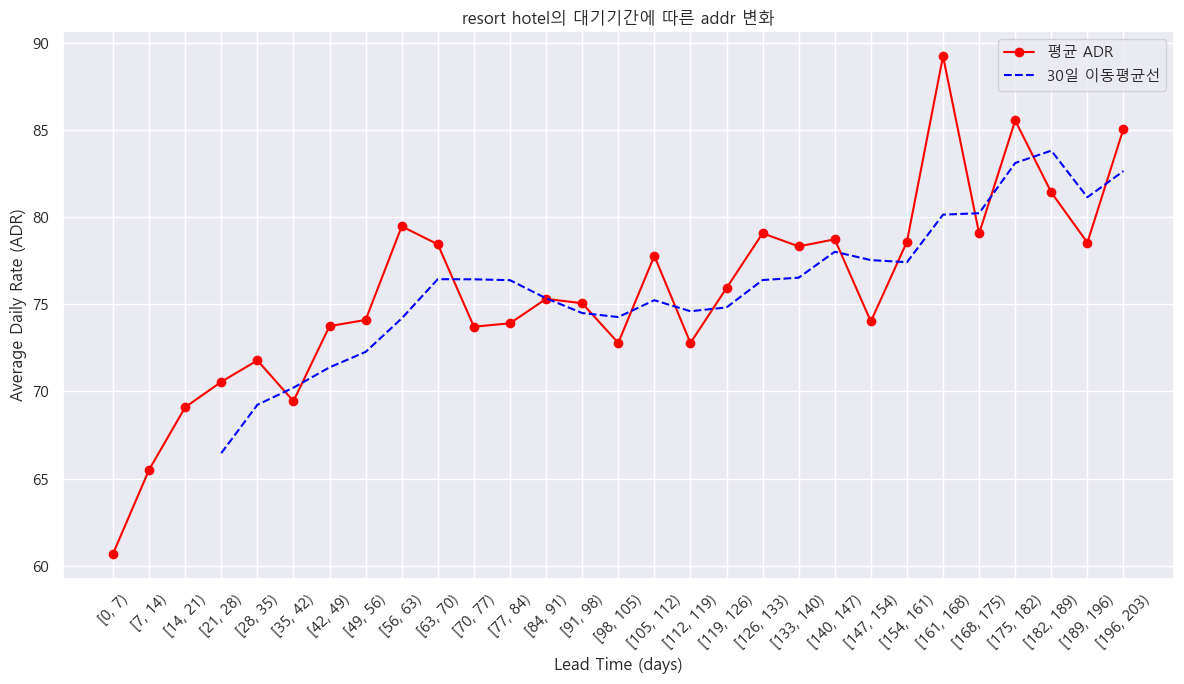

C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\4202339956.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['lead_time_bin'] = pd.cut(city_df['lead_time'], bins=range(0, max(city_df['lead_time']) + 7, 7), right=False)


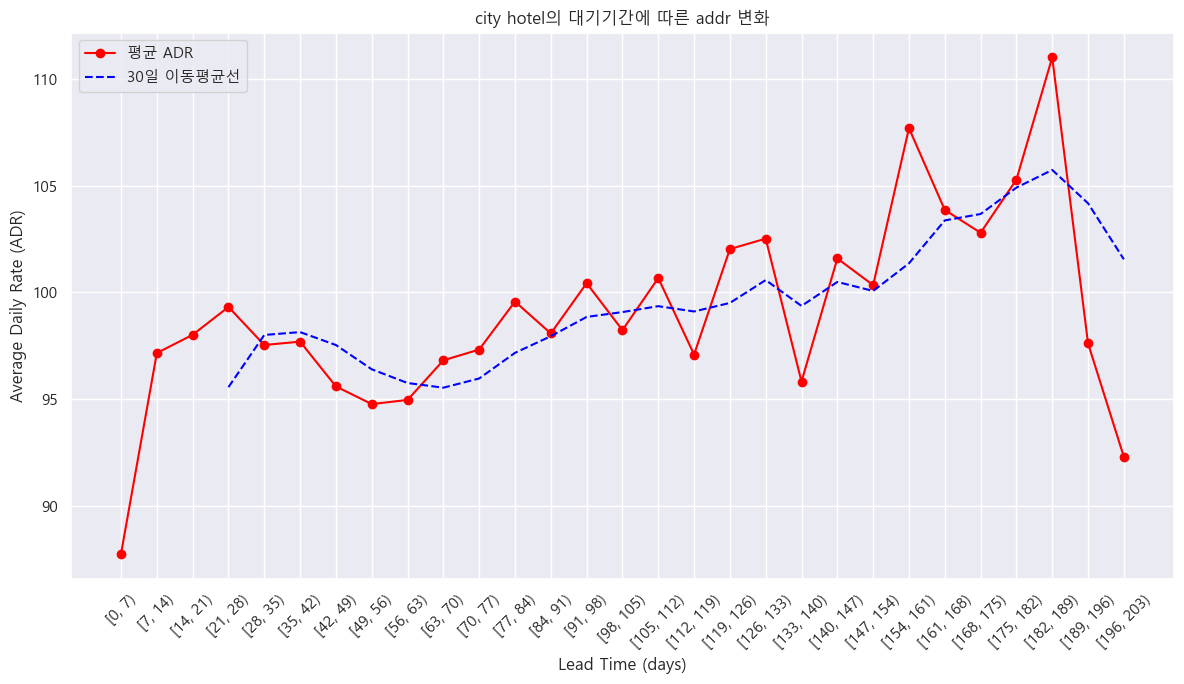

In [94]:
# 호텔 타입별(Resort, City)로 데이터 분리
resort_df = filtered_200[filtered_200['hotel'] == 'Resort Hotel']
city_df = filtered_200[filtered_200['hotel'] == 'City Hotel']

# resort hotel 대상
# lead_time을 7일 단위로 그룹화한 컬럼 생성
resort_df['lead_time_bin'] = pd.cut(resort_df['lead_time'], bins=range(0, max(resort_df['lead_time']) + 7, 7), right=False)

# 각 그룹의 평균 adr 계산
resort_df_grouped_data_bin = resort_df.groupby('lead_time_bin')['adr'].mean().reset_index()

# 타입 변경
resort_df_grouped_data_bin['lead_time_bin'] = resort_df_grouped_data_bin['lead_time_bin'].astype(str)

# 30일 이동평균선 계산
resort_df_grouped_data_bin['moving_average_adr'] = resort_df_grouped_data_bin['adr'].rolling(window=4).mean()

# 시각화
plt.figure(figsize=(12, 7))
plt.plot(resort_df_grouped_data_bin['lead_time_bin'], resort_df_grouped_data_bin['adr'], label='평균 ADR', color='red', marker='o', linestyle='-')
plt.plot(resort_df_grouped_data_bin['lead_time_bin'], resort_df_grouped_data_bin['moving_average_adr'], label='30일 이동평균선', color='blue', marker='', linestyle='--')
plt.title('resort hotel의 대기기간에 따른 addr 변화')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# city hotel 대상
# lead_time을 7일 단위로 그룹화한 컬럼 생성
city_df['lead_time_bin'] = pd.cut(city_df['lead_time'], bins=range(0, max(city_df['lead_time']) + 7, 7), right=False)

# 각 그룹의 평균 adr 계산
city_df_grouped_data_bin = city_df.groupby('lead_time_bin')['adr'].mean().reset_index()

# 타입 변경
city_df_grouped_data_bin['lead_time_bin'] = city_df_grouped_data_bin['lead_time_bin'].astype(str)

# 30일 이동평균선 계산
city_df_grouped_data_bin['moving_average_adr'] = city_df_grouped_data_bin['adr'].rolling(window=4).mean()

# 시각화
plt.figure(figsize=(12, 7))
plt.plot(city_df_grouped_data_bin['lead_time_bin'], city_df_grouped_data_bin['adr'], label='평균 ADR', color='red', marker='o', linestyle='-')
plt.plot(city_df_grouped_data_bin['lead_time_bin'], city_df_grouped_data_bin['moving_average_adr'], label='30일 이동평균선', color='blue', marker='', linestyle='--')
plt.title('city hotel의 대기기간에 따른 addr 변화')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
print(city_df_grouped_data_bin)

   lead_time_bin         adr  moving_average_adr
0         [0, 7)   87.748098                 NaN
1        [7, 14)   97.159377                 NaN
2       [14, 21)   98.016480                 NaN
3       [21, 28)   99.321221           95.561294
4       [28, 35)   97.537349           98.008607
5       [35, 42)   97.696082           98.142783
6       [42, 49)   95.595551           97.537551
7       [49, 56)   94.766812           96.398949
8       [56, 63)   94.961820           95.755066
9       [63, 70)   96.819409           95.535898
10      [70, 77)   97.324045           95.968021
11      [77, 84)   99.574276           97.169887
12      [84, 91)   98.080440           97.949542
13      [91, 98)  100.437457           98.854055
14     [98, 105)   98.234503           99.081669
15    [105, 112)  100.678580           99.357745
16    [112, 119)   97.091259           99.110450
17    [119, 126)  102.036018           99.510090
18    [126, 133)  102.525459          100.582829
19    [133, 140)   9

In [93]:
print(city_df.groupby('lead_time_bin')['lead_time'].count())

lead_time_bin
[0, 7)        8630
[7, 14)       3855
[14, 21)      3418
[21, 28)      2465
[28, 35)      2946
[35, 42)      2749
[42, 49)      2196
[49, 56)      2127
[56, 63)      2264
[63, 70)      2216
[70, 77)      1931
[77, 84)      1513
[84, 91)      1567
[91, 98)      1624
[98, 105)     1850
[105, 112)    1261
[112, 119)    1477
[119, 126)    1120
[126, 133)    1134
[133, 140)    1300
[140, 147)    1132
[147, 154)    1164
[154, 161)    1066
[161, 168)    1039
[168, 175)     876
[175, 182)    1217
[182, 189)     879
[189, 196)     860
[196, 203)     510
Name: lead_time, dtype: int64


In [ ]:
# 호텔 타입별(Resort, City)로 데이터 분리
resort_df = filtered_200[filtered_200['hotel'] == 'Resort Hotel']
city_df = filtered_200[filtered_200['hotel'] == 'City Hotel']

## 1-3 자식 수에 따른 예약 취소 여부

In [31]:
# 어린이 수 확인
booking_df['children'].value_counts()

0.0     110799
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

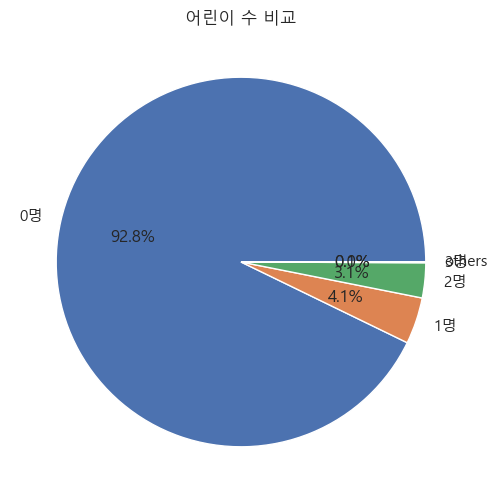

In [32]:
# 어린이 수 파이차트
plt.figure(figsize=(8, 6))
plt.pie(booking_df['children'].value_counts().values,
        labels = booking_df['children'].value_counts().index.map({0: '0명', 1:'1명', 2:'2명', 3:'3명', 10:'others' }),
       autopct = '%.1f%%')
plt.title('어린이 수 비교')
plt.show()

In [33]:
# 아기 수 확인
booking_df['babies'].value_counts()

0     118472
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

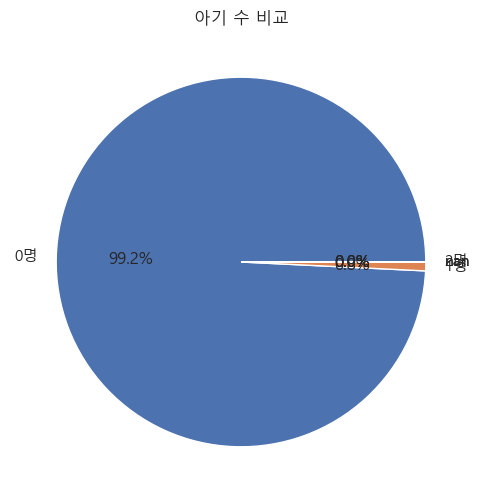

In [34]:
# 아기 수 파이차트
plt.figure(figsize=(8, 6))
plt.pie(booking_df['babies'].value_counts().values,
        labels = booking_df['babies'].value_counts().index.map({0: '0명', 1:'1명', 2:'2명', (9,10):'others' }),
       autopct = '%.1f%%')
plt.title('아기 수 비교')
plt.show()

C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\2767663440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df['total_child'] = booking_df['children'] + booking_df['babies']
C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\2767663440.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df['child_label'] = booking_df['total_child'].apply(label_children)


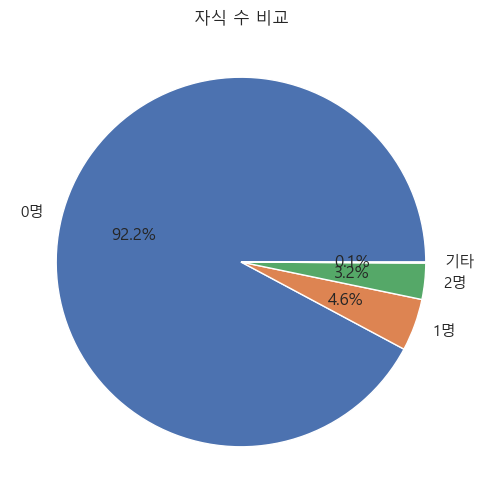

In [35]:
# 어린와 유아 수를 합한 컬럼 total_child 생성
booking_df['total_child'] = booking_df['children'] + booking_df['babies']

# 자식 수에 따른 레이블 지정
def label_children(x):
    if x == 0:
        return '0명'
    elif x == 1:
        return '1명'
    elif x == 2:
        return '2명'
    else:
        return '기타'

# 레이블 적용
booking_df['child_label'] = booking_df['total_child'].apply(label_children)    

plt.figure(figsize=(8, 6))
plt.pie(booking_df['child_label'].value_counts().values,
        labels=booking_df['child_label'].value_counts().index,
        autopct='%.1f%%')
plt.title('자식 수 비교')
plt.show()




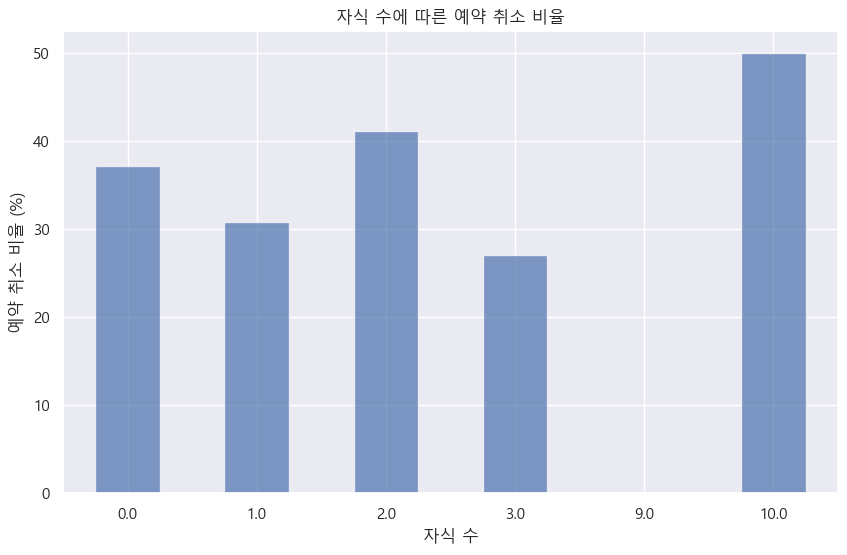

In [36]:
# 자식 수 별로 그룹화하고, 예약 취소 비율 계산
cancellation_rate_by_children = booking_df.groupby('total_child')['is_canceled'].mean() * 100

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
cancellation_rate_by_children.plot(kind='bar', alpha=0.7)
plt.title('자식 수에 따른 예약 취소 비율')
plt.xlabel('자식 수')
plt.ylabel('예약 취소 비율 (%)')
plt.xticks(rotation=0)  # x축 레이블의 회전 각도
plt.show()

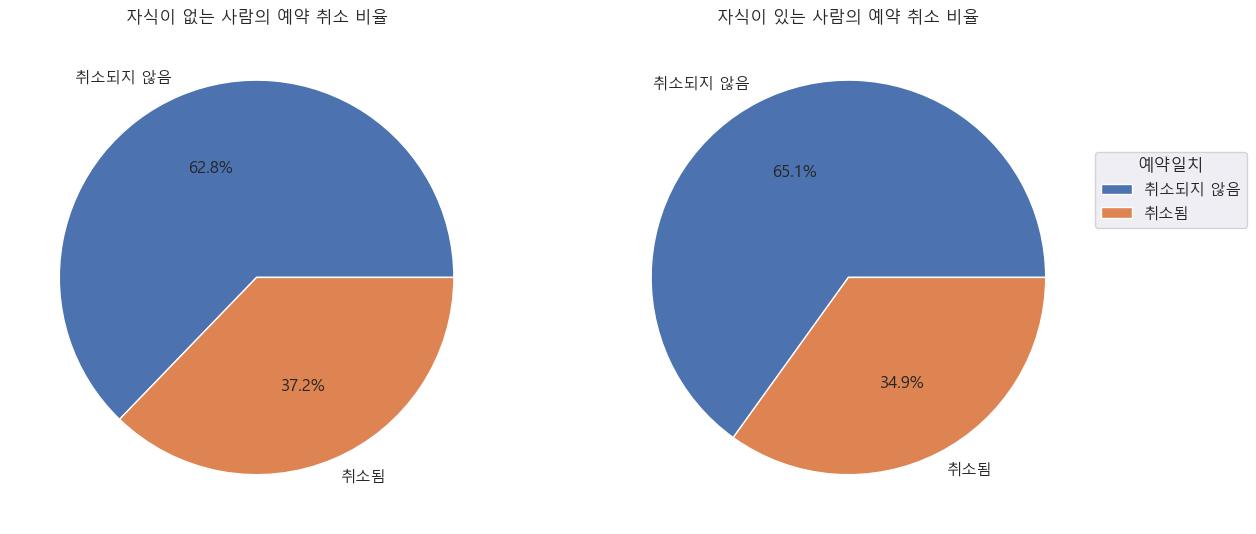

In [37]:
# 자식이 없는 사람이 앞도적으로 많기에 자식 유무에 따른 취소 비율을 구해보자
not_child = booking_df[booking_df['total_child'] == 0]['is_canceled'].value_counts()
child = booking_df[booking_df['total_child'] != 0]['is_canceled'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(not_child,
         labels=not_child.index.map({0: '취소되지 않음', 1: '취소됨'}), 
          autopct='%.1f%%')
ax[0].set_title('자식이 없는 사람의 예약 취소 비율')

ax[1].pie(child,
         labels=child.index.map({0: '취소되지 않음', 1: '취소됨'}),
          autopct='%.1f%%')
ax[1].set_title('자식이 있는 사람의 예약 취소 비율')

plt.legend(loc = (1, 0.6), title='예약일치')
plt.show()


- 자식 유무는 예약 취소에 영향을 미치지 않는 것으로 보임

## 1-4 예약 객실에 따른 예약 취소 여부(객실에 따라 비용이 차이가 크기에)

In [38]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  float64
 11  babies                          119389 non-null  int64  
 12  meal            

In [39]:
booking_df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

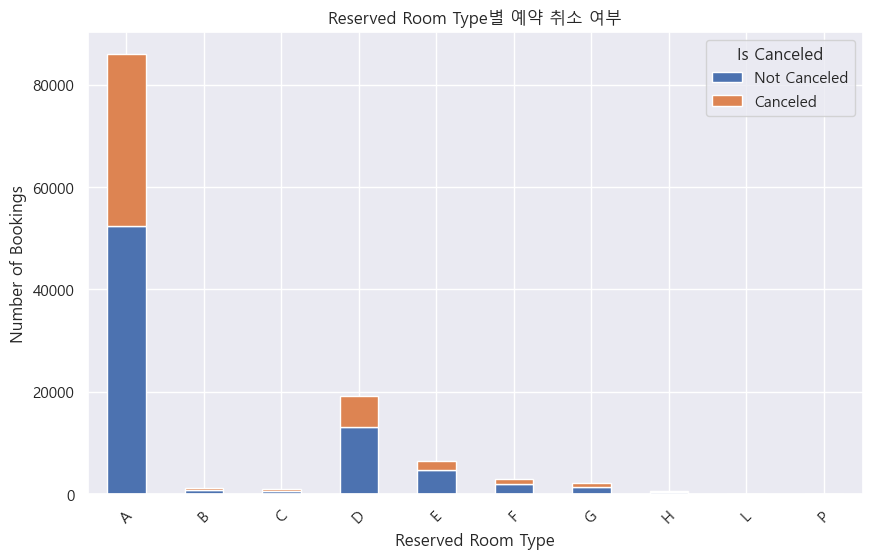

In [40]:
# reserved_room_type별로 is_canceled의 분포 집계
room_cancellation = booking_df.groupby('reserved_room_type')['is_canceled'].value_counts().unstack()

# 바 차트로 시각화
room_cancellation.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Reserved Room Type별 예약 취소 여부')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

## 1-4-2 예약 객실과 배정된 객실은 얼마나 동일할까

In [41]:
def check(x):
    if x['reserved_room_type'] == x['assigned_room_type']:
        return True
    else:
        return False

# 동일한지 여부를 담은 컬럼 추가
booking_df['room_type_check'] = booking_df.apply(check, axis=1)
booking_df['room_type_check'].head()

C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\3284527879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df['room_type_check'] = booking_df.apply(check, axis=1)


0     True
1     True
2    False
3     True
4     True
Name: room_type_check, dtype: bool

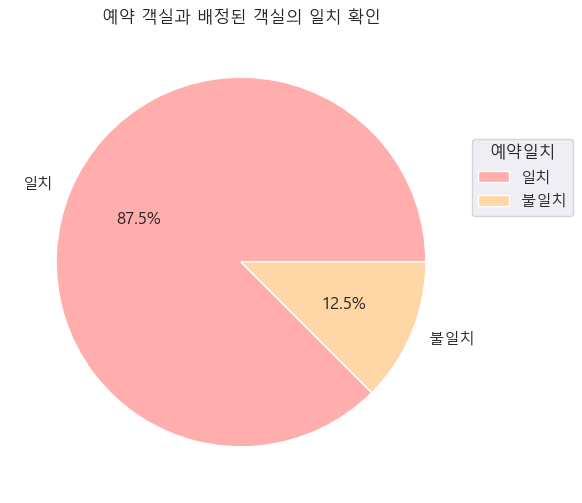

In [42]:
# 파이차트 시각화
plt.figure(figsize=(10, 6))
plt.pie(booking_df['room_type_check'].value_counts().values,
        labels = booking_df['room_type_check'].value_counts().index.map({True: '일치', False: '불일치'}),
        autopct='%.1f%%',
        colors = ['#ffadad', '#ffd6a5']
        #textprops = {'color': 'white'}
       )
plt.title('예약 객실과 배정된 객실의 일치 확인')
plt.legend(loc = (1, 0.6), title='예약일치')
plt.show()

### 1-4-3 객실의 일치 여부에 따른 예약 취소 비율 확인

C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\121788618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df['room_type_check'] = booking_df.apply(check, axis=1)


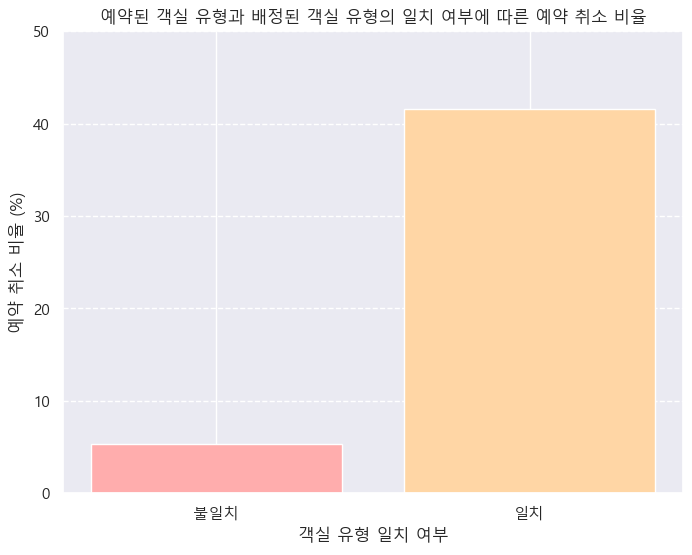

In [43]:
# 예약된 객실 유형과 배정된 객실 유형의 일치 여부를 검사하는 함수 정의
def check(x):
    return x['reserved_room_type'] == x['assigned_room_type']

# room_type_check 컬럼 생성
booking_df['room_type_check'] = booking_df.apply(check, axis=1)

# 객실 유형의 일치 여부에 따른 취소 비율 계산
cancellation_rates = booking_df.groupby('room_type_check')['is_canceled'].mean().reset_index()

# 결과를 더 읽기 쉽게 만들기 위해 불리언 값을 문자열로 변환
cancellation_rates['room_type_check'] = cancellation_rates['room_type_check'].map({True: '일치', False: '불일치'})

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(cancellation_rates['room_type_check'], cancellation_rates['is_canceled'] * 100, color=['#ffadad', '#ffd6a5'])
plt.title('예약된 객실 유형과 배정된 객실 유형의 일치 여부에 따른 예약 취소 비율')
plt.xlabel('객실 유형 일치 여부')
plt.ylabel('예약 취소 비율 (%)')
plt.ylim(0, 50)  # y축 범위 설정
plt.xticks([0, 1], ['불일치', '일치'])
plt.grid(axis='y', linestyle='--')

plt.show()

### 1-4-3 객실의 일치 여부에 따른 재방문 여부?

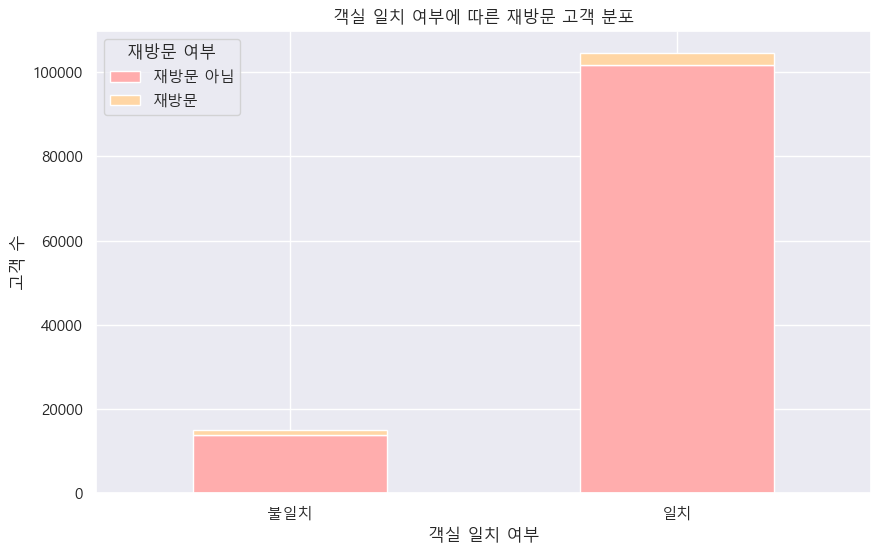

In [44]:
# 객실 일치 여부와 재방문 여부를 기준으로 그룹화하고, 크기를 계산
grouped_data = booking_df.groupby(['room_type_check', 'is_repeated_guest']).size().unstack()

# 시각화
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ffadad', '#ffd6a5'])
plt.title('객실 일치 여부에 따른 재방문 고객 분포')
plt.xlabel('객실 일치 여부')
plt.ylabel('고객 수')
plt.xticks(ticks=[0, 1], labels=['불일치', '일치'], rotation=0)
plt.legend(title='재방문 여부', labels=['재방문 아님', '재방문'])

plt.show()

- 객실의 일치 여부와 재방문은 관계가 없어보임
- 이 데이터만으로는 파악하기 힘들지만 객실의 일치가 업그레이드일 가능성이 높은데 만약 업그레이드라면 객실을 업그레이드 해준다고 재방문하는 것같지는 않음

## 1-5 평균 일일 숙박비에 따른 예약 취소 여부

In [45]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  float64
 11  babies                          119389 non-null  int64  
 12  meal            

### 평균 일일 숙박비 분포(box_plot)

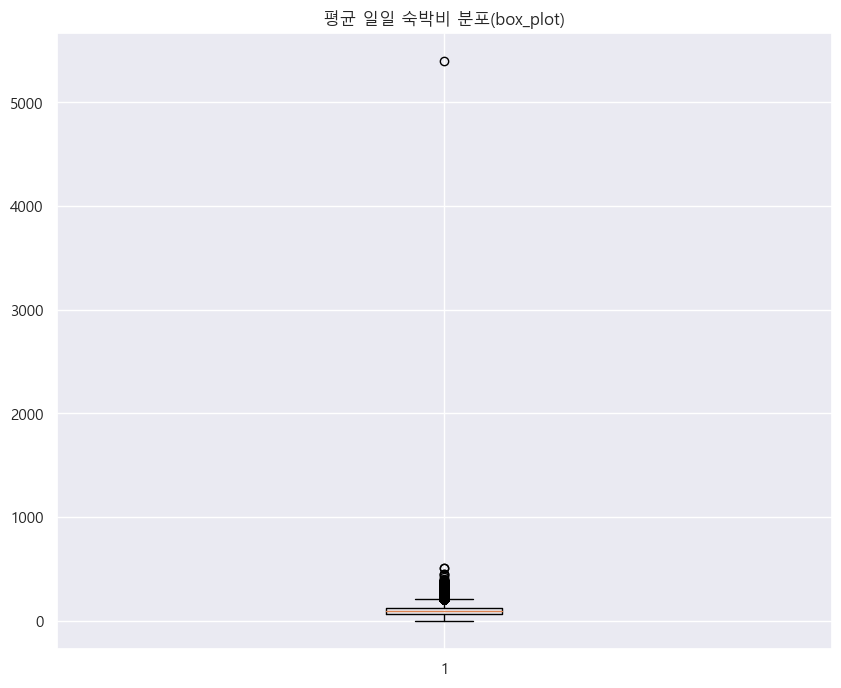

In [46]:
plt.boxplot(booking_df['adr'])
plt.title('평균 일일 숙박비 분포(box_plot)')
plt.show()

In [47]:
booking_df['adr'].describe()

count    119389.000000
mean        101.832028
std          50.535032
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

### 일일 숙박비에 따른 취소 여부

In [99]:
# -인 값이 있는 부분과 150이 넘는 값은 제외하고 그 사이 범위에서 계산
filtered_0_to_150 = booking_df[(booking_df['adr'] >= 0) & (booking_df['adr'] <= 150)]

filtered_0_to_150_canceled = filtered_0_to_150[filtered_0_to_150['is_canceled'] == 1]['adr']
filtered_0_to_150_not_canceled =filtered_0_to_150[filtered_0_to_150['is_canceled'] == 0]['adr']

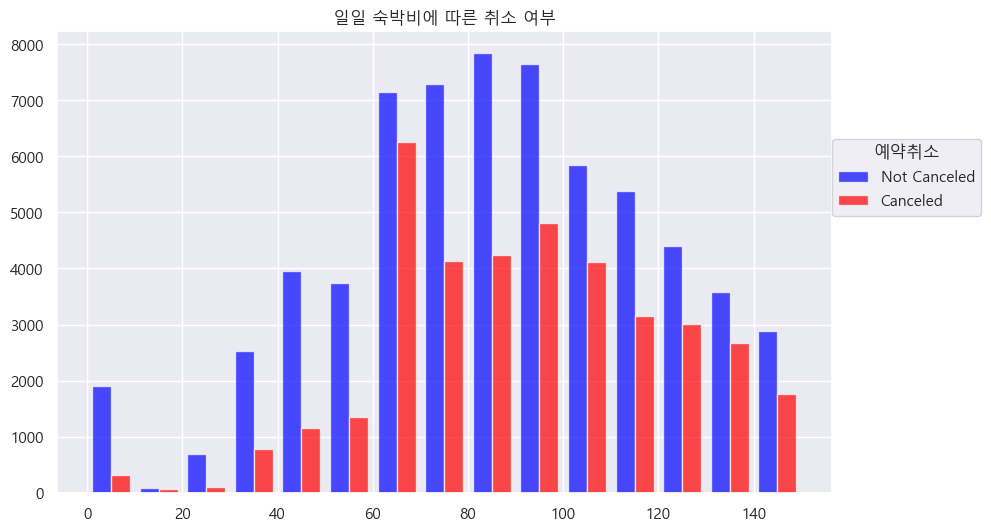

In [100]:
plt.figure(figsize=(10, 6))
plt.hist([filtered_0_to_150_not_canceled, filtered_0_to_150_canceled],
         label=['Not Canceled', 'Canceled'],
         color=['blue', 'red'], 
         alpha=0.7, 
         bins=15)
plt.title('일일 숙박비에 따른 취소 여부')
plt.legend(loc = (1, 0.6), title='예약취소')
plt.show()

### 일일 숙박비(ADR)에 따른 예약 취소 비율

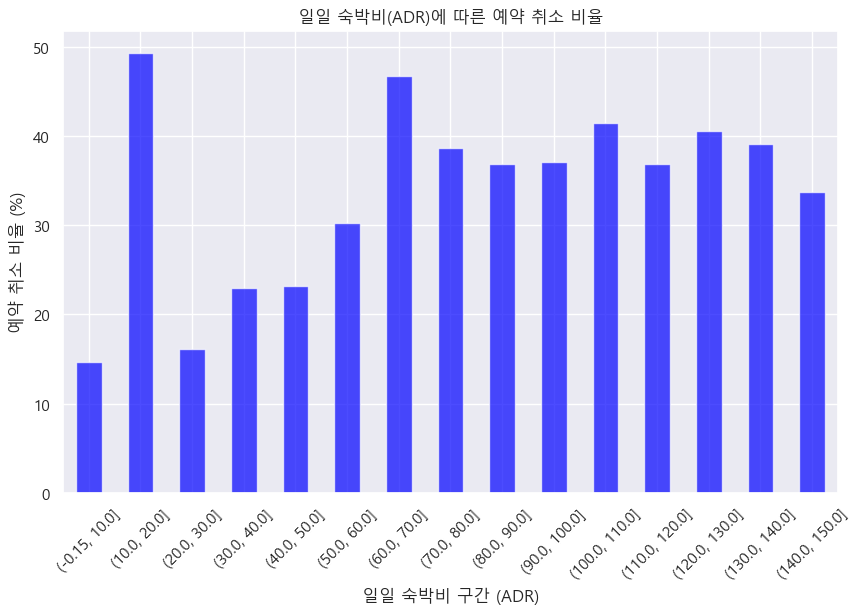

In [102]:
# adr 값을 구간으로 나눔
filtered_0_to_150 = booking_df[(booking_df['adr'] >= 0) & (booking_df['adr'] <= 150)]
adr_bins = pd.cut(filtered_0_to_150['adr'], bins=15)

# 구간별로 취소 비율 계산
cancellation_rate = filtered_0_to_150.groupby(adr_bins)['is_canceled'].mean() * 100

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar', color='blue', alpha=0.7)
plt.title('일일 숙박비(ADR)에 따른 예약 취소 비율')
plt.xlabel('일일 숙박비 구간 (ADR)')
plt.ylabel('예약 취소 비율 (%)')
plt.xticks(rotation=45)
plt.show()

- 10~20이 취소 비율이 가장 높았고
- 60~70이 두번째로 높았다
- 대체로 60이하에서는 예약 취소 비율이 비교적 낮았고 60이상부터 대체로 높았다

### 숙소 별 일일 숙박비 분포 비교

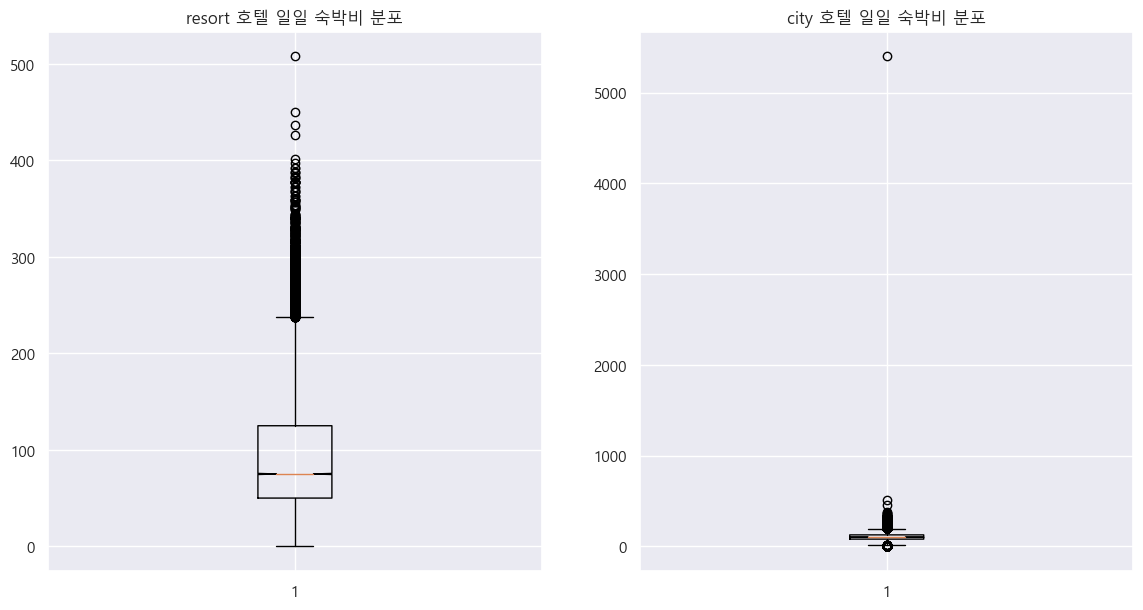

In [51]:
# 숙소 별 일일 숙박비 분포 비교
resort_adr = booking_df[booking_df['hotel']=='Resort Hotel']['adr']
city_adr = booking_df[booking_df['hotel']=='City Hotel']['adr']

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].boxplot(resort_adr, notch=True)
ax[0].set_title('resort 호텔 일일 숙박비 분포')
ax[1].boxplot(city_adr, notch=True)
ax[1].set_title('city 호텔 일일 숙박비 분포')
plt.show()

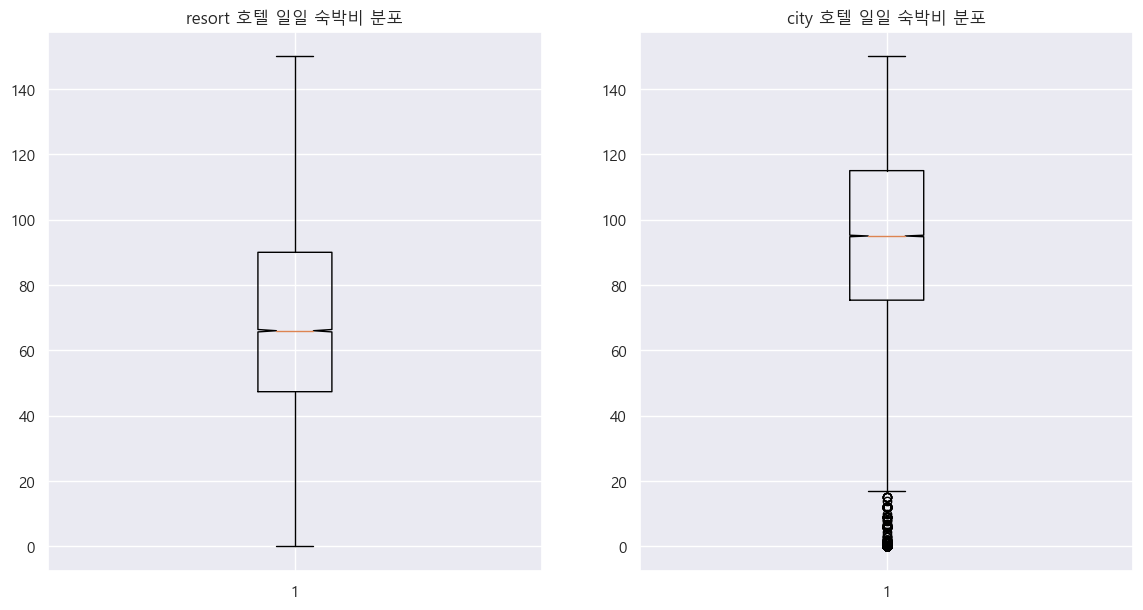

In [52]:
# 숙소 별 일일 숙박비 분포 비교
resort_adr = filtered_0_to_150[filtered_0_to_150['hotel']=='Resort Hotel']['adr']
city_adr = filtered_0_to_150[filtered_0_to_150['hotel']=='City Hotel']['adr']

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].boxplot(resort_adr, notch=True)
ax[0].set_title('resort 호텔 일일 숙박비 분포')
ax[1].boxplot(city_adr, notch=True)
ax[1].set_title('city 호텔 일일 숙박비 분포')
plt.show()

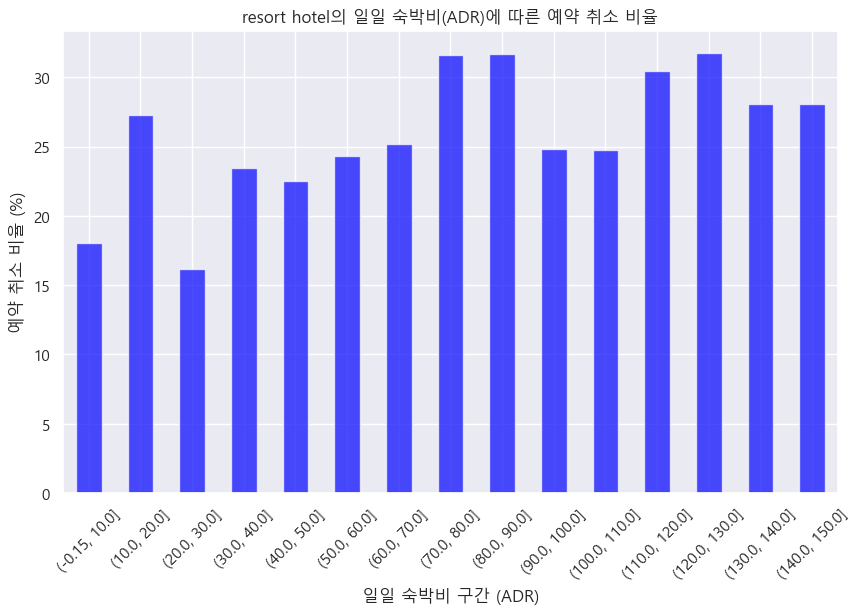

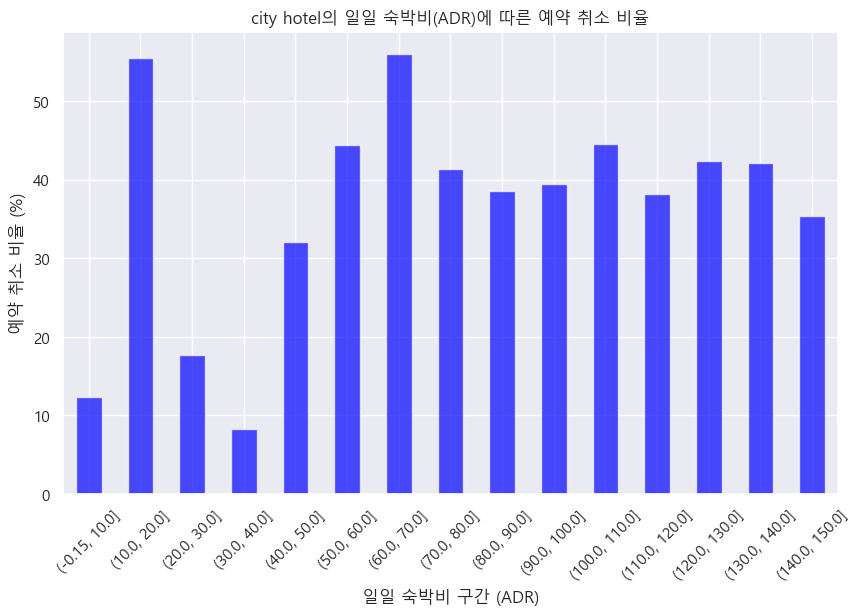

In [103]:
filtered_0_to_150 = booking_df[(booking_df['adr'] >= 0) & (booking_df['adr'] <= 150)]
resort_df = filtered_0_to_150[filtered_0_to_150['hotel']=='Resort Hotel']
city_df = filtered_0_to_150[filtered_0_to_150['hotel']=='City Hotel']

# resort hotel
# adr 값을 구간으로 나눔
resort_adr_bins = pd.cut(resort_df['adr'], bins=15)

# 구간별로 취소 비율 계산
resort_cancellation_rate = resort_df.groupby(resort_adr_bins)['is_canceled'].mean() * 100

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
resort_cancellation_rate.plot(kind='bar', color='blue', alpha=0.7)
plt.title('resort hotel의 일일 숙박비(ADR)에 따른 예약 취소 비율')
plt.xlabel('일일 숙박비 구간 (ADR)')
plt.ylabel('예약 취소 비율 (%)')
plt.xticks(rotation=45)
plt.show()

# city hotel
# adr 값을 구간으로 나눔
city_adr_bins = pd.cut(city_df['adr'], bins=15)

# 구간별로 취소 비율 계산
city_cancellation_rate = city_df.groupby(city_adr_bins)['is_canceled'].mean() * 100

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
city_cancellation_rate.plot(kind='bar', color='blue', alpha=0.7)
plt.title('city hotel의 일일 숙박비(ADR)에 따른 예약 취소 비율')
plt.xlabel('일일 숙박비 구간 (ADR)')
plt.ylabel('예약 취소 비율 (%)')
plt.xticks(rotation=45)
plt.show()

In [105]:
city_adr_bins.value_counts()

(80.0, 90.0]      9732
(90.0, 100.0]     9699
(60.0, 70.0]      9211
(70.0, 80.0]      8832
(100.0, 110.0]    8410
(110.0, 120.0]    7182
(120.0, 130.0]    5857
(130.0, 140.0]    4569
(140.0, 150.0]    2925
(50.0, 60.0]      1761
(-0.15, 10.0]     1317
(40.0, 50.0]       381
(10.0, 20.0]       119
(30.0, 40.0]        97
(20.0, 30.0]        17
Name: adr, dtype: int64

- 평균적으로 city호텔의 일일 숙박비가 더 높았다

In [53]:
booking_df['previous_cancellations'].describe()

count    119389.000000
mean          0.087119
std           0.844340
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: previous_cancellations, dtype: float64

In [54]:
booking_df['previous_bookings_not_canceled'].describe()

count    119389.000000
mean          0.137081
std           1.497433
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.000000
Name: previous_bookings_not_canceled, dtype: float64

In [55]:
booking_df[booking_df['booking_changes'] != 0]['booking_changes'].count()

18075

<Axes: >

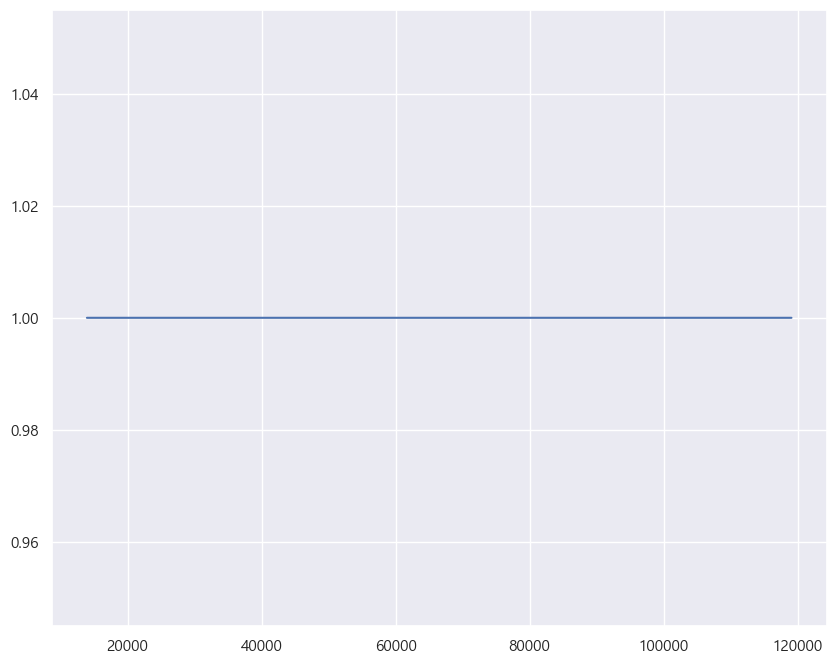

In [56]:
booking_df[booking_df['is_repeated_guest'] != 0]['is_repeated_guest'].plot()

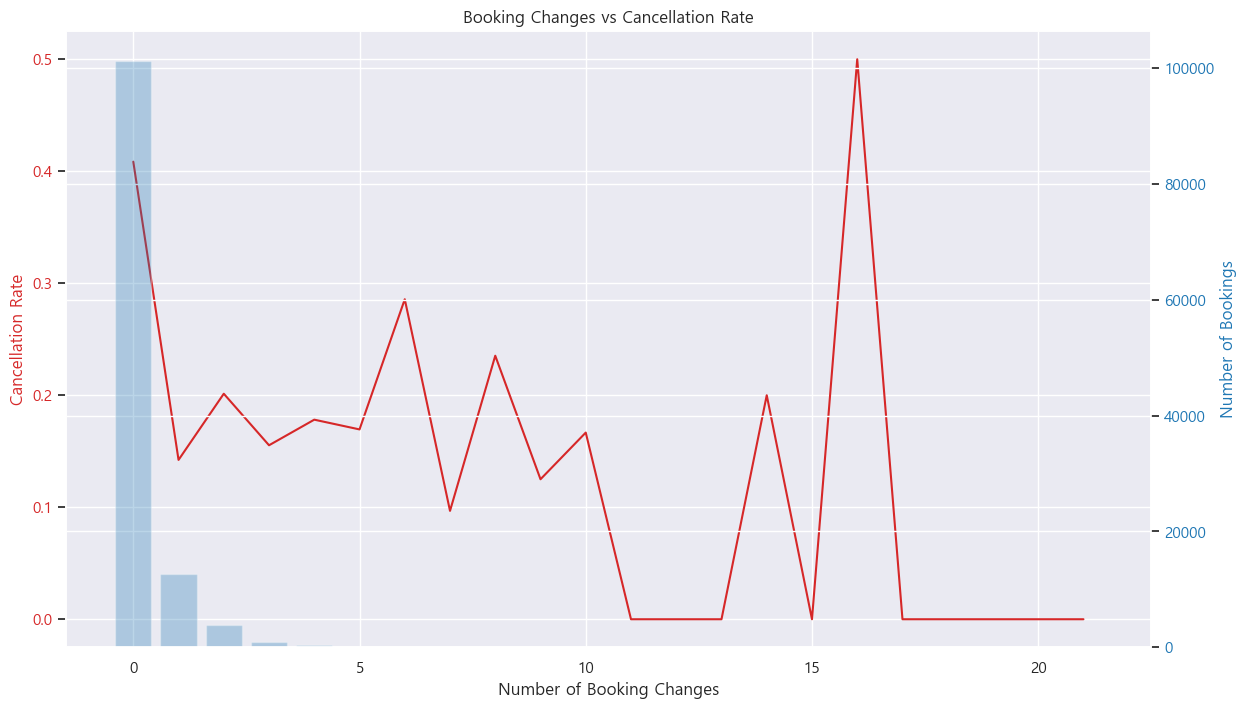

In [57]:
# 예약 변경 횟수별로 데이터 그룹화 및 취소 비율 계산
cancellation_rate_by_changes = booking_df.groupby('booking_changes')['is_canceled'].mean()

# 예약 변경 횟수별 예약 수 계산
booking_changes_distribution = booking_df['booking_changes'].value_counts().sort_index()

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(14, 8))

# 취소 비율을 빨간색 선으로 표시
color = 'tab:red'
ax1.set_xlabel('Number of Booking Changes')
ax1.set_ylabel('Cancellation Rate', color=color)
ax1.plot(cancellation_rate_by_changes.index, cancellation_rate_by_changes.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 예약 수를 파란색 바로 표시하기 위해 두 번째 y축 생성
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Number of Bookings', color=color)  
ax2.bar(booking_changes_distribution.index, booking_changes_distribution.values, color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# 차트 제목 설정 및 표시
plt.title('Booking Changes vs Cancellation Rate')
plt.show()

In [58]:
booking_df[booking_df['booking_changes'] == 16]['booking_changes'].count()

2

In [59]:
booking_df['booking_changes'].describe()

count    119389.000000
mean          0.221109
std           0.652288
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64

<Axes: >

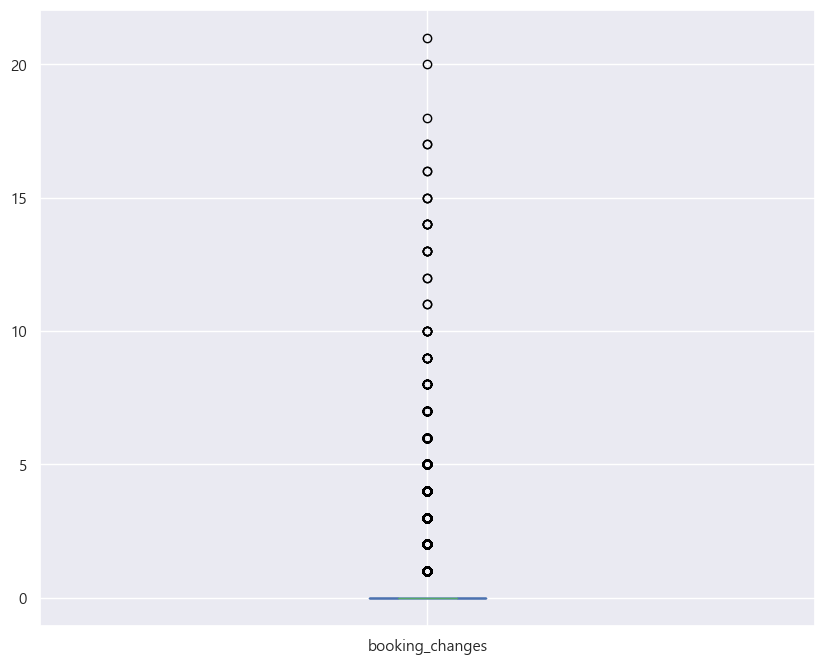

In [60]:
booking_df['booking_changes'].plot(kind='box', notch=True)

C:\Users\youn3\AppData\Local\Temp\ipykernel_1500\218533450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df['booking_changes_group'] = pd.cut(booking_df['booking_changes'], bins=[-1, 0, 1, 2, float('inf')], labels=['0', '1', '2', '3+'])


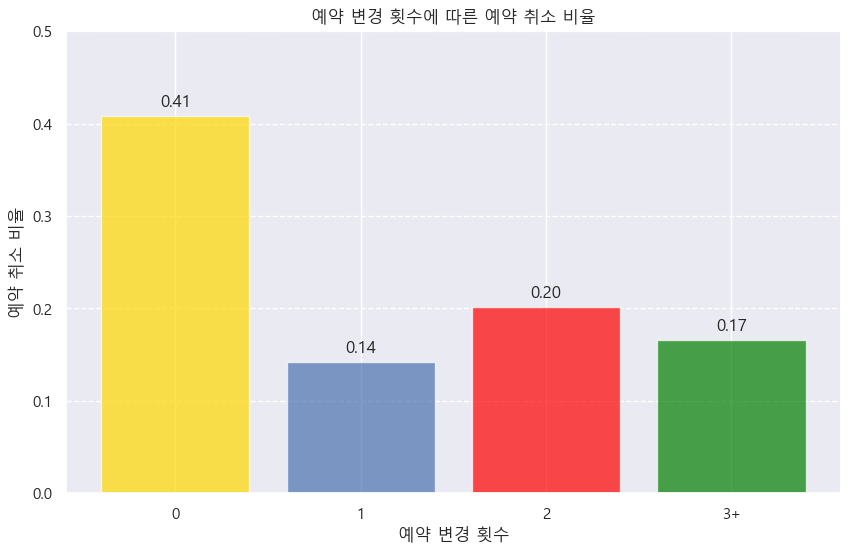

In [72]:
# 예약 변경 횟수를 0, 1, 2, 그 이상으로 구분하는 새로운 열 추가
booking_df['booking_changes_group'] = pd.cut(booking_df['booking_changes'], bins=[-1, 0, 1, 2, float('inf')], 
                                             labels=['0', '1', '2', '3+'])

# 새로운 구분에 따른 취소 비율 계산
cancellation_rate_by_group = booking_df.groupby('booking_changes_group')['is_canceled'].mean()

# 취소 비율 데이터 준비
group_labels = ['0', '1', '2', '3+']
cancellation_rates = cancellation_rate_by_group.values

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(group_labels, cancellation_rates, color=['gold', 'b', '#FF0000', 'green'], alpha=0.7)

# 라벨링
plt.xlabel('예약 변경 횟수')
plt.ylabel('예약 취소 비율')
plt.title('예약 변경 횟수에 따른 예약 취소 비율')
plt.ylim(0, 0.5)  # y축 범위 설정
plt.grid(axis='y', linestyle='--')

# 각 바에 취소 비율 표시
for i, rate in enumerate(cancellation_rates):
    plt.text(i, rate + 0.01, f'{rate:.2f}', ha='center')

plt.show()

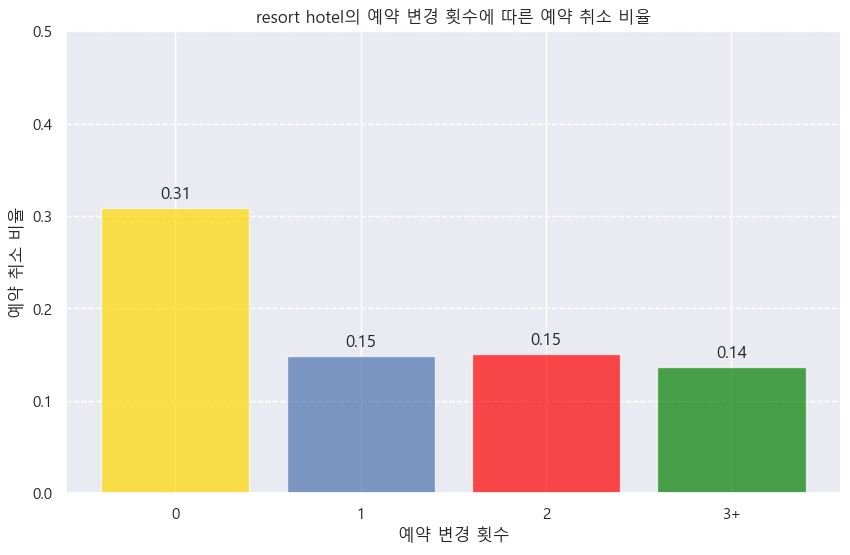

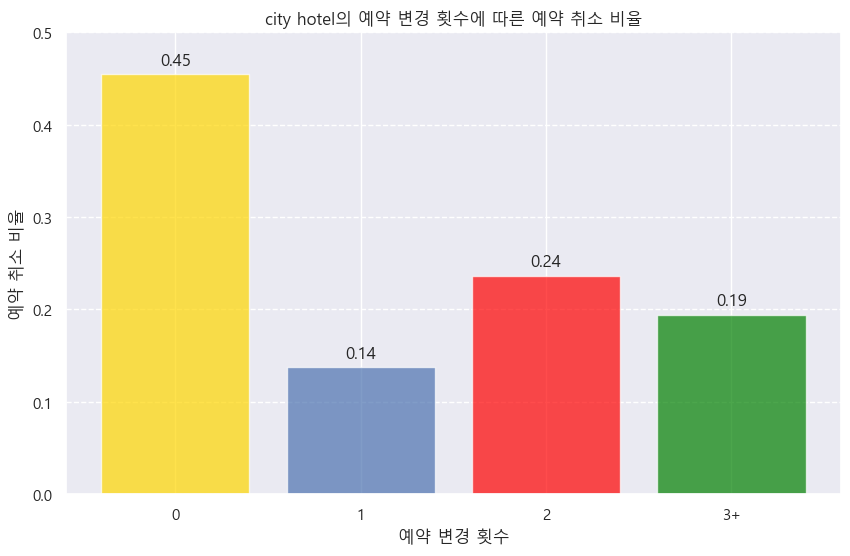

In [125]:
# 호텔 타입별(Resort, City)로 데이터 분리
resort_df = booking_df[booking_df['hotel'] == 'Resort Hotel'].copy()
city_df = booking_df[booking_df['hotel'] == 'City Hotel'].copy()

# resort
# 예약 변경 횟수를 0, 1, 2, 그 이상으로 구분하는 새로운 열 추가
resort_df['booking_changes_group'] = pd.cut(resort_df['booking_changes'], bins=[-1, 0, 1, 2, float('inf')], 
                                            labels=['0', '1', '2', '3+'])

# 새로운 구분에 따른 취소 비율 계산
resort_df_cancellation_rate_by_group = resort_df.groupby('booking_changes_group')['is_canceled'].mean()

# 취소 비율 데이터 준비
resort_df_group_labels = ['0', '1', '2', '3+']
resort_df_cancellation_rates = resort_df_cancellation_rate_by_group.values

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(resort_df_group_labels, resort_df_cancellation_rates, color=['gold', 'b', '#FF0000', 'green'], alpha=0.7)

# 라벨링
plt.xlabel('예약 변경 횟수')
plt.ylabel('예약 취소 비율')
plt.title('resort hotel의 예약 변경 횟수에 따른 예약 취소 비율')
plt.ylim(0, 0.5)  # y축 범위 설정
plt.grid(axis='y', linestyle='--')

# 각 바에 취소 비율 표시
for i, rate in enumerate(resort_df_cancellation_rates):
    plt.text(i, rate + 0.01, f'{rate:.2f}', ha='center')

plt.show()

#city
# 예약 변경 횟수를 0, 1, 2, 그 이상으로 구분하는 새로운 열 추가
city_df['booking_changes_group'] = pd.cut(city_df['booking_changes'], bins=[-1, 0, 1, 2, float('inf')], 
                                          labels=['0', '1', '2', '3+'])

# 새로운 구분에 따른 취소 비율 계산
city_df_cancellation_rate_by_group = city_df.groupby('booking_changes_group')['is_canceled'].mean()

# 취소 비율 데이터 준비
city_df_group_labels = ['0', '1', '2', '3+']
city_df_cancellation_rates = city_df_cancellation_rate_by_group.values

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(city_df_group_labels, city_df_cancellation_rates, color=['gold', 'b', '#FF0000', 'green'], alpha=0.7)

# 라벨링
plt.xlabel('예약 변경 횟수')
plt.ylabel('예약 취소 비율')
plt.title('city hotel의 예약 변경 횟수에 따른 예약 취소 비율')
plt.ylim(0, 0.5)  # y축 범위 설정
plt.grid(axis='y', linestyle='--')

# 각 바에 취소 비율 표시
for i, rate in enumerate(city_df_cancellation_rates):
    plt.text(i, rate + 0.01, f'{rate:.2f}', ha='center')

plt.show()

### 고객 타입에 따른 취소 유형

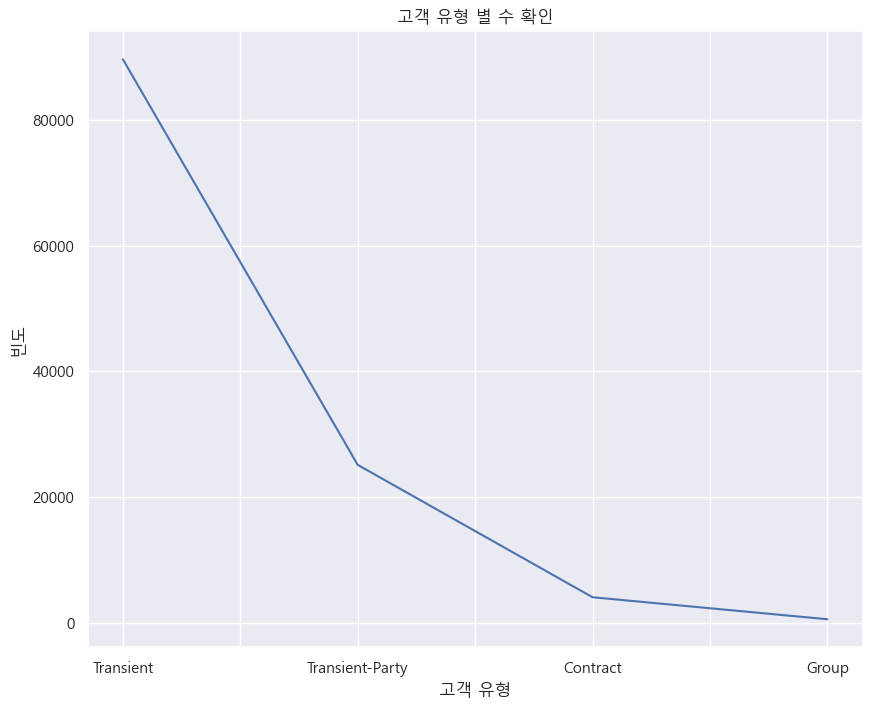

In [62]:
# 고객유형 수 확인
booking_df['customer_type'].value_counts().plot()
plt.title('고객 유형 별 수 확인')
plt.xlabel('고객 유형')
plt.ylabel('빈도')
plt.show()

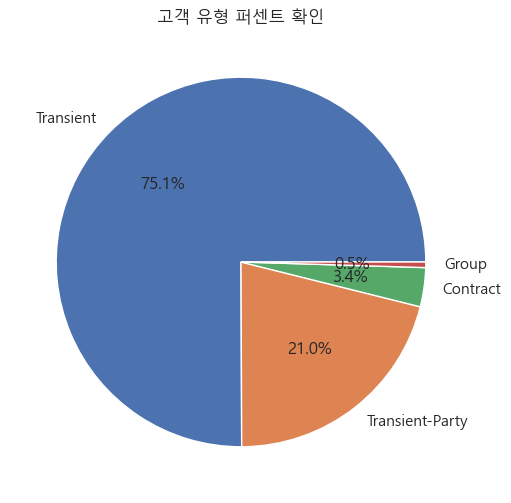

In [63]:
# pie chart로 비율 시각화
plt.figure(figsize=(8, 6))
plt.pie(booking_df['customer_type'].value_counts().values,
       labels = booking_df['customer_type'].value_counts().index,
       autopct='%.1f%%')
plt.title('고객 유형 퍼센트 확인')
plt.show()

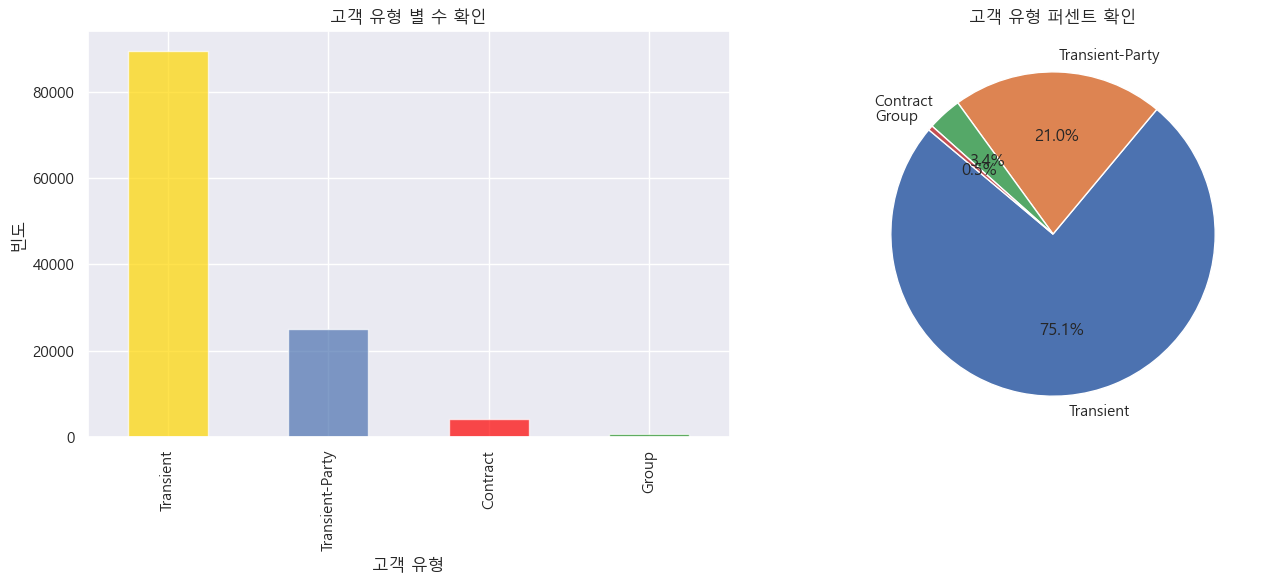

In [68]:
# 고객 유형 별 수 확인을 위한 막대 그래프와 파이 차트 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 막대 그래프
booking_df['customer_type'].value_counts().plot(kind='bar', ax=ax[0], color = ['gold', 'b', '#FF0000', 'green'], alpha = 0.7)
ax[0].set_title('고객 유형 별 수 확인')
ax[0].set_xlabel('고객 유형')
ax[0].set_ylabel('빈도')

# 파이 차트
ax[1].pie(booking_df['customer_type'].value_counts().values,
       labels=booking_df['customer_type'].value_counts().index,
       autopct='%.1f%%', startangle=140)
ax[1].set_title('고객 유형 퍼센트 확인')

plt.tight_layout()
plt.show()

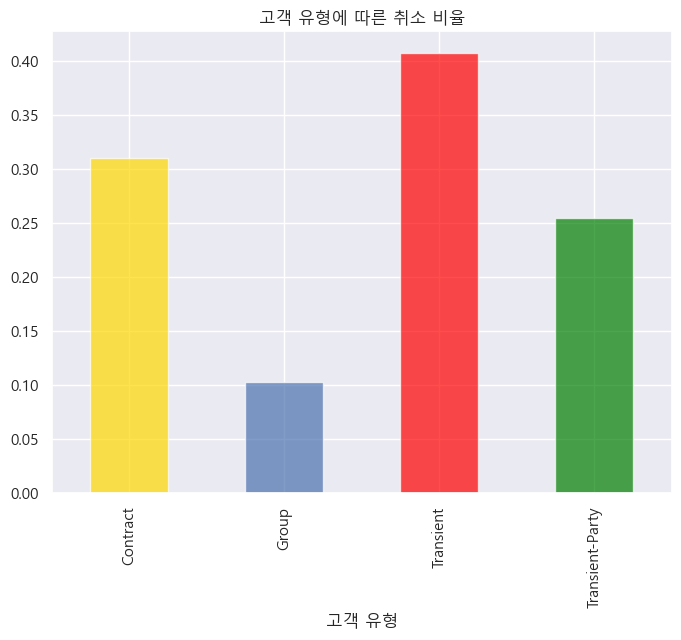

In [71]:
# 고객 유형에 따른 취소 비율
cancellation_rates_ct = booking_df.groupby('customer_type')['is_canceled'].mean()

# 시각화
plt.figure(figsize = (8,6))
cancellation_rates_ct.plot(kind='bar', color = ['gold', 'b', '#FF0000', 'green'], alpha=0.7)
plt.title('고객 유형에 따른 취소 비율')
plt.xlabel('고객 유형')
plt.show()

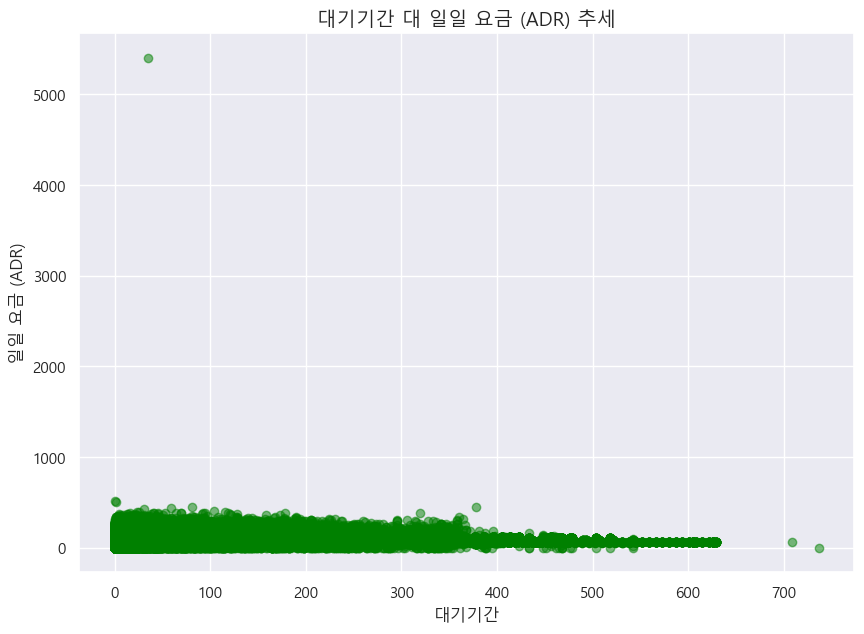

In [78]:
# 호텔 타입별(Resort, City)로 데이터 분리
resort_df = filtered_200[filtered_200['hotel'] == 'Resort Hotel']
city_df = filtered_200[filtered_200['hotel'] == 'City Hotel']

# 대기기간에 따른 일일 요금(ADR)의 추세 시각화
plt.figure(figsize=(10, 7))

# 산점도로 데이터 포인트 표시
plt.scatter(booking_df['lead_time'], booking_df['adr'], alpha=0.5, color='green')

plt.title('대기기간 대 일일 요금 (ADR) 추세', fontsize=14)
plt.xlabel('대기기간', fontsize=12)
plt.ylabel('일일 요금 (ADR)', fontsize=12)
plt.show()

In [ ]:
lead_time_adr = booking_df['lead_Time']

In [124]:
booking_df[booking_df['days_in_waiting_list']==1].counts()

AttributeError: 'DataFrame' object has no attribute 'counts'

In [126]:
# 호텔 타입별(Resort, City)로 데이터 분리
resort_df = booking_df[booking_df['hotel'] == 'Resort Hotel'].copy()
city_df = booking_df[booking_df['hotel'] == 'City Hotel'].copy()

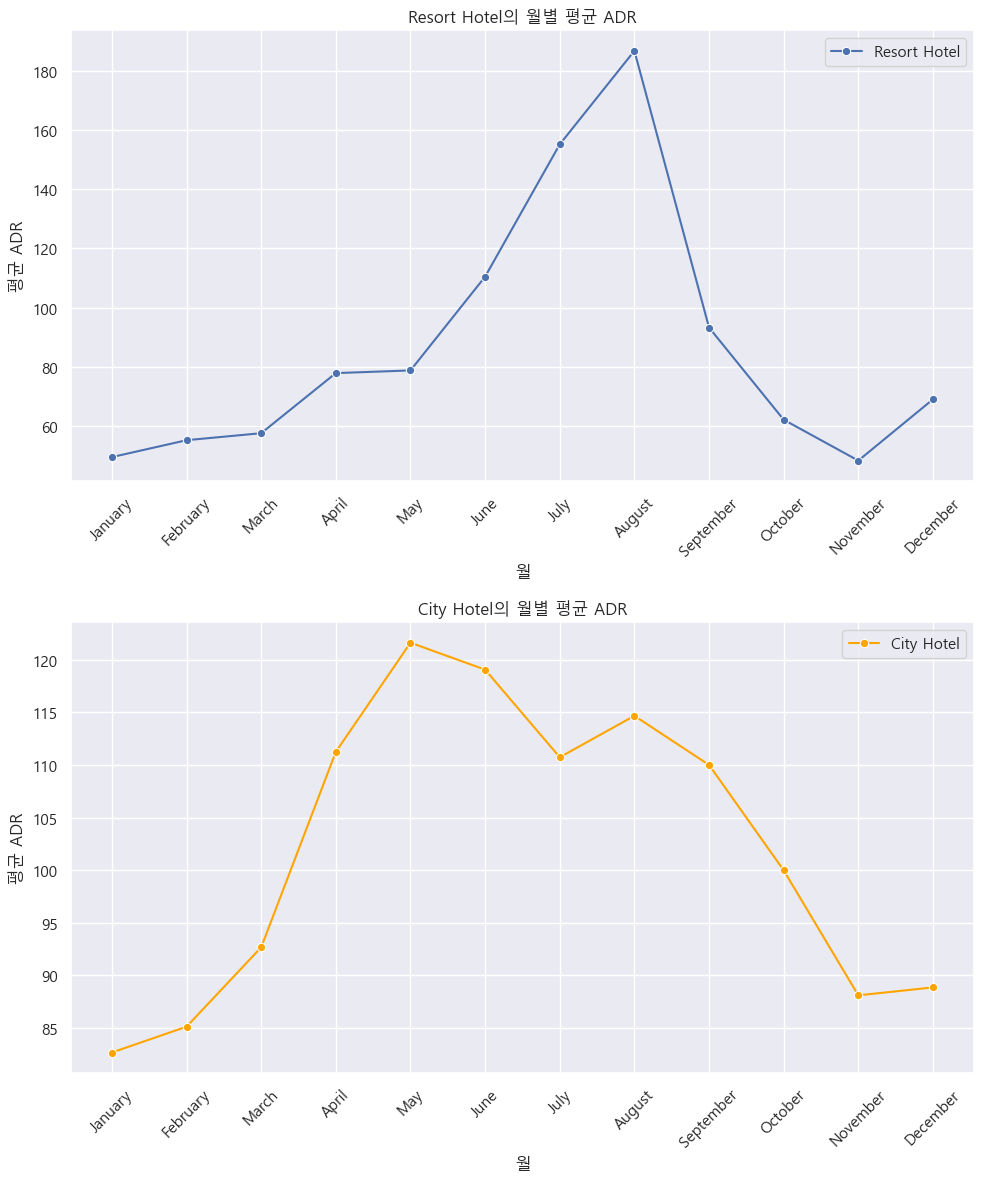

In [130]:
# 월별로 그룹화하여 평균 ADR 계산
resort_monthly_adr = resort_df.groupby('arrival_date_month')['adr'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
city_monthly_adr = city_df.groupby('arrival_date_month')['adr'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Resort Hotel 시각화
sns.lineplot(x=resort_monthly_adr.index, y=resort_monthly_adr.values, ax=ax[0], marker='o', label='Resort Hotel')
ax[0].set_title('Resort Hotel의 월별 평균 ADR')
ax[0].set_xlabel('월')
ax[0].set_ylabel('평균 ADR')
ax[0].tick_params(axis='x', rotation=45)

# City Hotel 시각화
sns.lineplot(x=city_monthly_adr.index, y=city_monthly_adr.values, ax=ax[1], marker='o', color='orange', label='City Hotel')
ax[1].set_title('City Hotel의 월별 평균 ADR')
ax[1].set_xlabel('월')
ax[1].set_ylabel('평균 ADR')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()